<span style="font-size: 23px;"> Naïve Bayes Model for predicting Heart Attack Risk<span>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import warnings 
from sklearn import metrics
warnings.filterwarnings("ignore")
import pickle

<span style="font-size: 18px;">1. Load the data from CSV<span> 

In [29]:
data = pd.read_csv('../US_Heart_Patients.csv',index_col=None)

<span style="font-size: 18px;">2. Perform the exploratory data analysis<span>


2.1. Showing first 10 rows of the data

In [30]:
data.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


2.2. Check the shape i.e. dimension of data

In [31]:
data.shape

(4240, 16)

2.3. 5-point summary (like Median, 25%, 75%, Minimum and Maximum)

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
education,4130.0,1.979903,1.019943,1.00,1.00,2.000,3.00,4.0
currentSmoker,4237.0,0.494218,0.500026,0.00,0.00,0.000,1.00,1.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
BP Meds,4180.0,0.029665,0.169682,0.00,0.00,0.000,0.00,1.0
prevalentStroke,4231.0,0.005909,0.076650,0.00,0.00,0.000,0.00,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.000,1.00,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.000,0.00,1.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0


2.4. Information about the column (data types)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


2.5. Check the How many rows of data are having heart risk

In [34]:
data['Heart-Att'].value_counts()

Heart-Att
0    3596
1     644
Name: count, dtype: int64

2.6. Check if any duplicate rows present or now

In [35]:
data.duplicated().sum()

0

2.7. Number of outliers

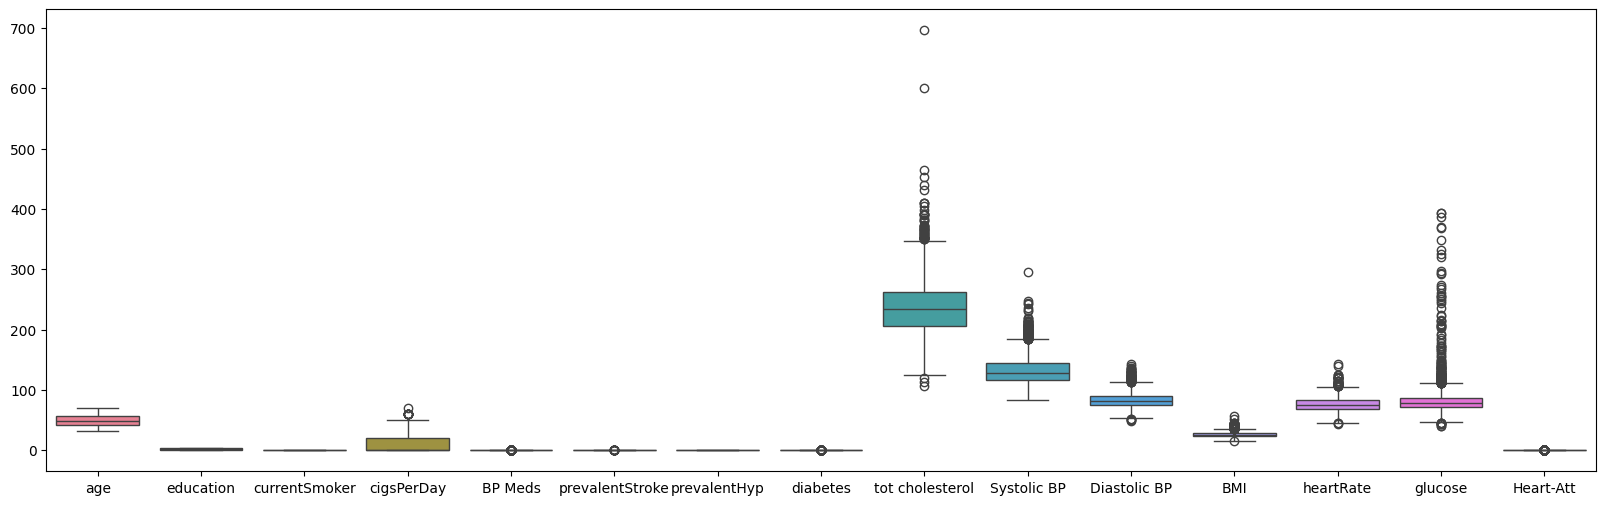

In [36]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=data)
plt.show()

2.8. Any missing value

In [37]:
print(data.isnull().sum())

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64


2.9. Categorical Treatment One hot encoding

In [38]:
data['Gender'].replace({"Male":1, "Female":0}, inplace=True)
data.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0.0,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0.0,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1.0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1.0,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


2.9. Correlation between variables

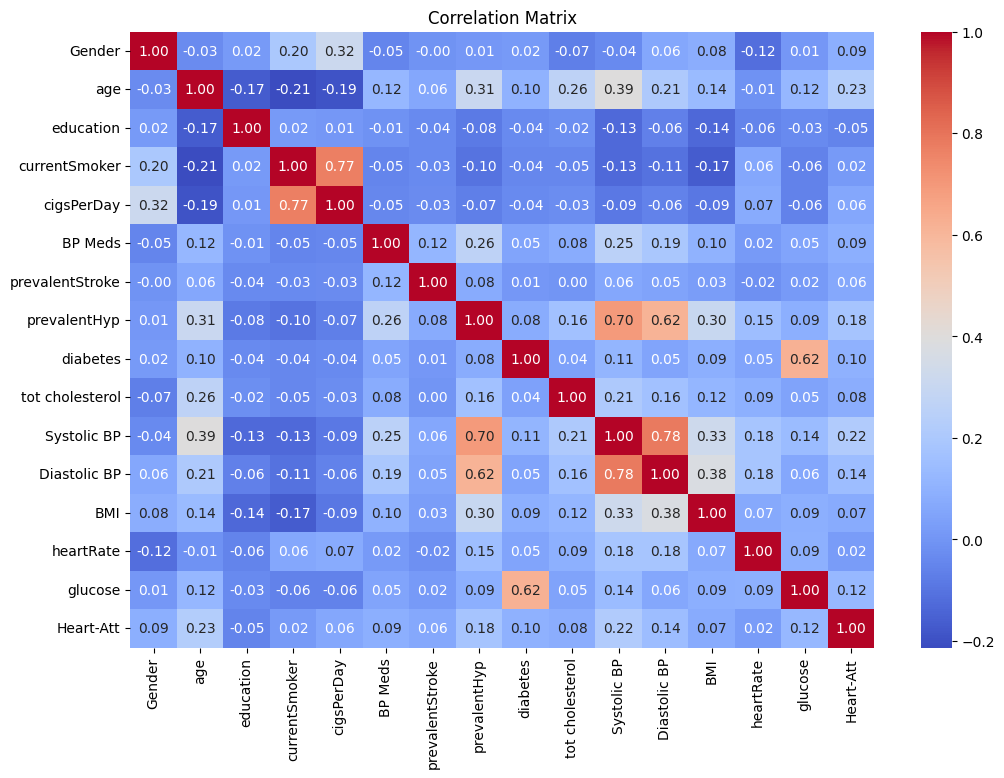

In [39]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

2.10. Distribution of variables

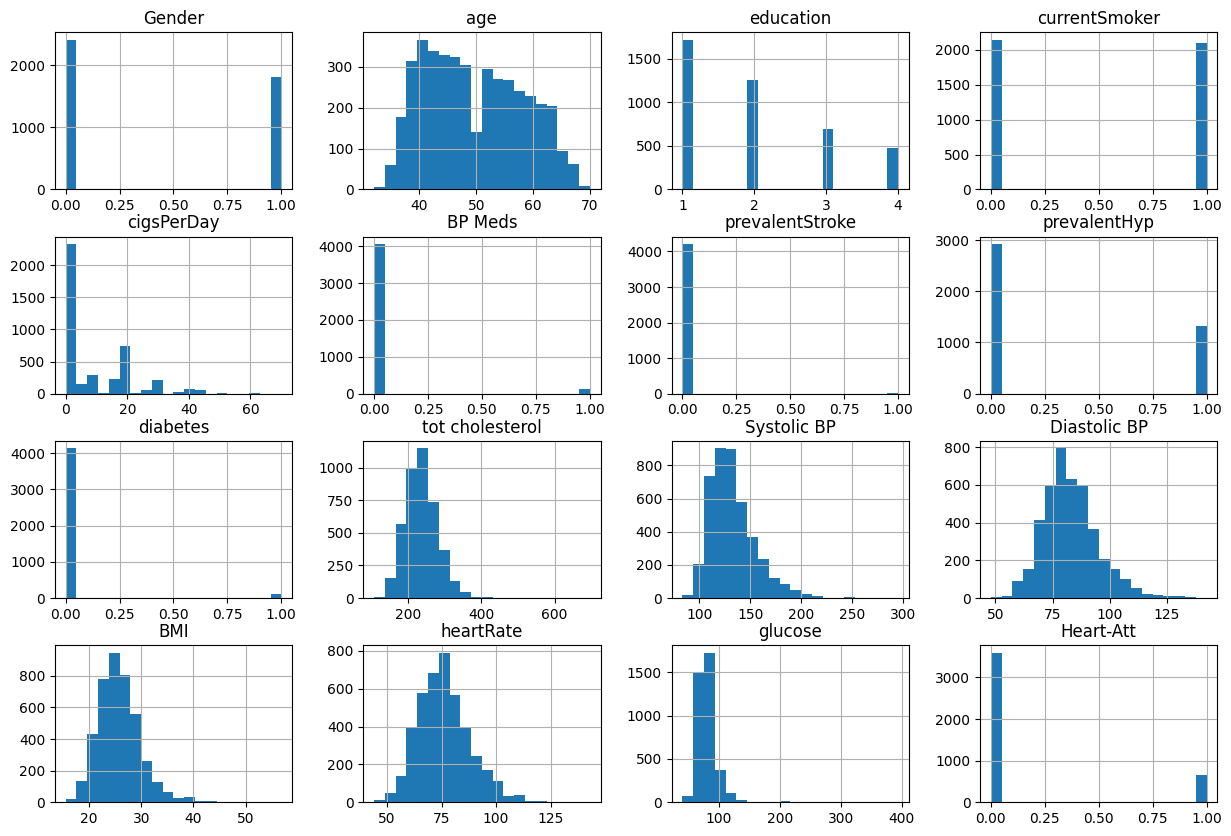

In [40]:
data.hist(figsize=(15, 10), bins=20)
plt.show()

<span style="font-size: 18px;">3. Data Preprocessing <span>

3.1. Impute the missing values (if any)

In [41]:
print(data.isnull().sum())

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64


In [42]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
print(data_imputed.isnull().sum())
data = data_imputed


Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64


3.2. Outlier treatment

3.2.1 Checking the outlier before treatment

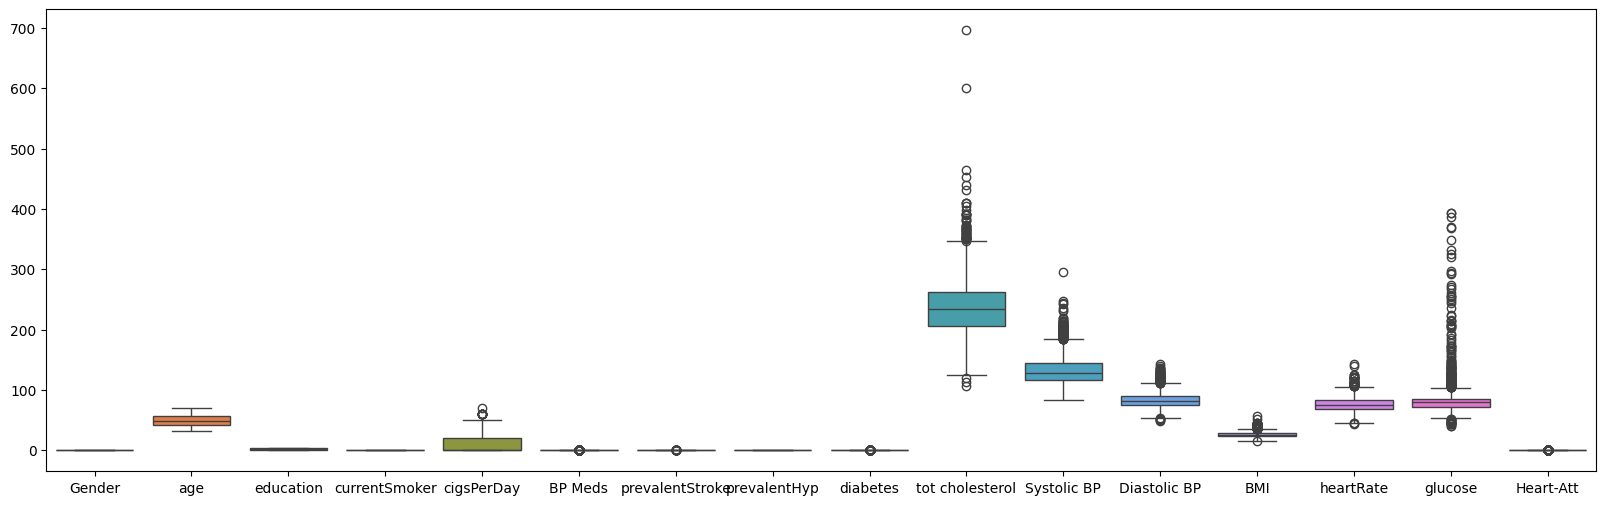

In [43]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=data)
plt.show()

3.2.2. Removing outlier data

In [44]:
def outlier_cap(col):
    sorted(col)
    Q1, Q3 =np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range


In [45]:
for column in data.columns[:-1].tolist():
    lr, ur =outlier_cap(data[column])
    data[column] =np.where(data[column]>ur , ur,data[column])
    data[column] =np.where(data[column]<lr , lr,data[column])

3.2.3. Showing box plot after removing all outliers

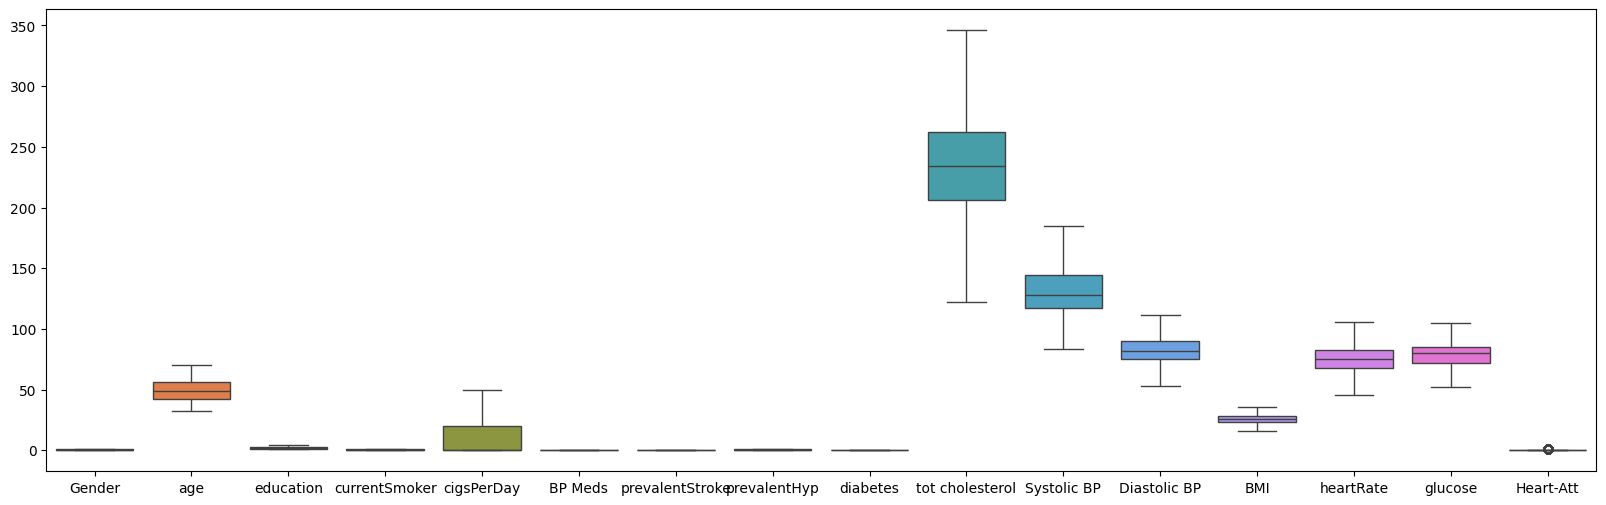

In [46]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=data)
plt.show()

<span style="font-size: 18px;">4. Split the dataset<span>

4.1. Spliting feature and response 

In [47]:
# Putting feature variable to X
X = data.drop('Heart-Att',axis=1)

# Putting response variable to y
y = data['Heart-Att']

4.2. Split the data into 80% training dataset and 20% test dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((3392, 15), (848, 15))

<span style="font-size: 18px;">5. Model preparation and evaluation<span>

5.1. Train the model with test data ( without hyper-parameters )

In [49]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

5.2. Creating helper function for checking model performance with confusion matrix and report

In [53]:
# Performance of model on train data
def model_performance(x,y):
    y_predict = NB_model.predict(x)
    model_score = NB_model.score(x, y)
    print(model_score)
    print(metrics.confusion_matrix(y,y_predict))
    print(metrics.classification_report(y,y_predict))

5.3. Model performance with Train data

In [54]:
model_performance(X_train, y_train)

0.7874410377358491
[[2494  377]
 [ 344  177]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      2871
         1.0       0.32      0.34      0.33       521

    accuracy                           0.79      3392
   macro avg       0.60      0.60      0.60      3392
weighted avg       0.79      0.79      0.79      3392



5.4. Model Performance with Test Data

In [55]:
model_performance(X_test, y_test)

0.7924528301886793
[[637  88]
 [ 88  35]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       725
         1.0       0.28      0.28      0.28       123

    accuracy                           0.79       848
   macro avg       0.58      0.58      0.58       848
weighted avg       0.79      0.79      0.79       848



<span style="font-size: 18px;">6. Dumping the final model<span>

In [56]:
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(NB_model,f)

<span style="font-size: 18px;">7. Loading the model to test and predict data<span>

In [57]:
with open("naive_bayes_model.pkl",'rb') as f:
    model_pkl = pickle.load(f)

In [58]:
X_test.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
1350,0.0,49.0,3.0,1.0,10.0,0.0,0.0,0.0,0.0,260.0,123.0,80.0,23.10,63.0,65.0
1434,1.0,43.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,201.0,121.0,82.0,23.84,70.0,91.0
2500,1.0,45.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,277.0,140.0,84.0,28.74,69.0,74.0
1128,0.0,63.0,3.0,1.0,10.0,0.0,0.0,1.0,0.0,236.0,184.5,103.0,27.91,60.0,74.0
4144,1.0,59.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,237.0,131.5,84.0,24.17,90.0,94.0


In [59]:
y_test.head(5)

1350    1.0
1434    0.0
2500    0.0
1128    0.0
4144    1.0
Name: Heart-Att, dtype: float64

7.1. Predicting one record from data set whose out put should be 0

Gender | age | education | currentSmoker | cigsPerDay | BP Meds | prevalentStroke | prevalentHyp | diabetes | tot cholesterol | Systolic BP | Diastolic BP | BMI  | heartRate | glucose | 
-------|-----|-----------|---------------|------------|---------|------------------|--------------|----------|-----------------|-------------|--------------|------|-----------|---------|
  1.0  | 43.0| 1.0       | 1.0           | 25.0       | 0.0     | 0.0              | 0.0          | 0.0      | 201.0           | 121.0       | 82.0         | 23.84| 70.0      | 91.0    |   



In [63]:
print(model_pkl.predict([[1.0,43.0,	1.0,1.0,25.0,0.0,0.0,0.0,0.0,201.0,121.0,82.0,23.84,70.0,91.0]]))

[0.]


7.2. Predicting one record outside data set

Gender | age | education | currentSmoker | cigsPerDay | BP Meds | prevalentStroke | prevalentHyp | diabetes | tot cholesterol | Systolic BP | Diastolic BP | BMI  | heartRate | glucose | 
-------|-----|-----------|---------------|------------|---------|------------------|--------------|----------|-----------------|-------------|--------------|------|-----------|---------|
  1.0  | 59.0| 3.0       | 1.0           | 10.0       | 0.0     | 0.0              | 0.0          | 0.0      | 210.0           | 123.0       | 80.0         | 23.10| 78.0      | 55.0    |  

In [62]:
print(model_pkl.predict([[1.0,59.0,	3.0,1.0,10.0,0.0,0.0,0.0,0.0,210.0,123.0,80.0,23.10,78.0,55.0]]))

[0.]
